In [ ]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, datasets
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [2]:
#Import the dataset and split the data into training and testing sets.
(input_train, output_train), (input_test, output_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#Reshape and normalize the input data to fit the size of the MNIST images and normalizing the pixel values.
input_train = input_train.reshape(-1, 28, 28, 1)
input_test = input_test.reshape(-1, 28, 28, 1)
input_train, input_test = input_train / 255.0, input_test / 255.0

In [4]:
#Use the one_hot function to encode the labeled data to be continuous instead of categorical by converting to one_hot encoded vectors with a depth of 10.
tf.one_hot(output_train.astype("float32"), depth=10)
tf.one_hot(output_test.astype("float32"), depth=10)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [5]:
#Create the CNN model with the Sequential class, and add all necessary layers to complete the model
sequential = Sequential()
sequential.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
sequential.add(layers.MaxPooling2D(2, 2))
sequential.add(layers.Conv2D(64, (3, 3), activation='relu')) 
sequential.add(layers.MaxPooling2D(2, 2))
sequential.add(layers.Conv2D(64, (3, 3), activation='relu')) 
sequential.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
sequential.add(layers.Flatten())
sequential.add(layers.Dense(64, activation='relu'))
sequential.add(layers.Dense(10))
sequential.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [7]:
#Compile and train the model 
sequential.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
training = sequential.fit(input_train, output_train, batch_size=128, epochs=5, validation_data=(input_test, output_test))

Epoch 1/5
469/469 [==============================] - 14s 29ms/step - loss: 0.2604 - accuracy: 0.9185 - val_loss: 0.0754 - val_accuracy: 0.9742
Epoch 2/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0400 - val_accuracy: 0.9860
Epoch 3/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 4/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0399 - val_accuracy: 0.9865
Epoch 5/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0310 - val_accuracy: 0.9897


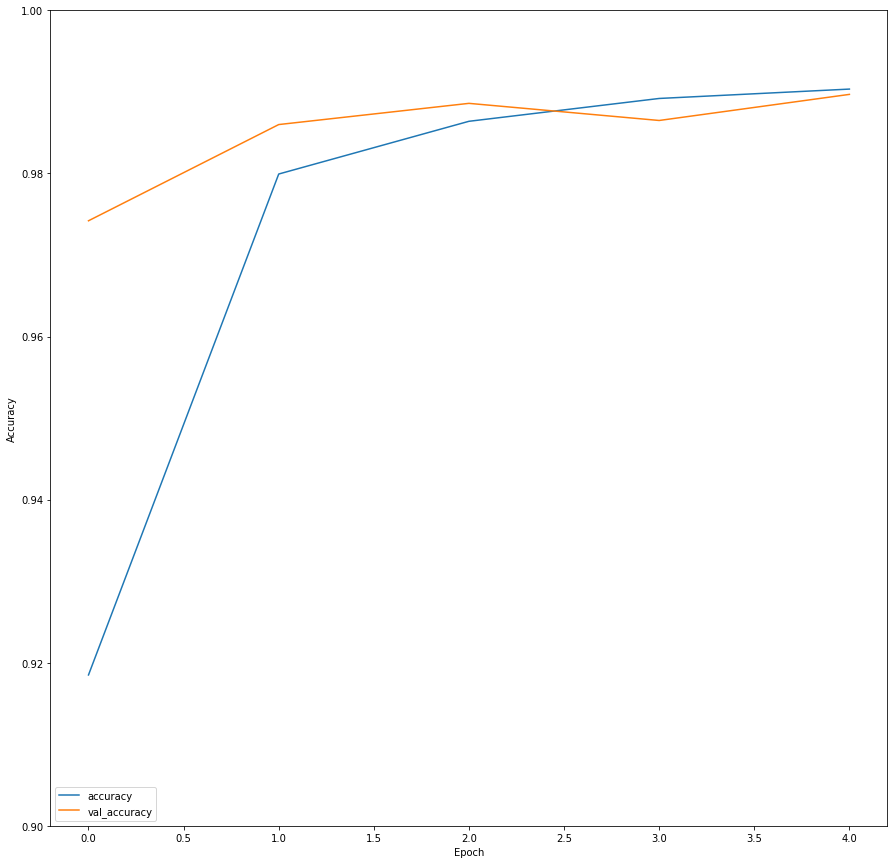

In [17]:
#Plot the accuracy of the model's training performance using matplotlib
plt.figure(figsize=(15,15))
plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([.9, 1])
plt.legend(loc='lower left')

In [11]:
#Evaluate the model's performance; calculate and return the loss and accuracy.
loss, accuracy = sequential.evaluate(input_test, output_test)
print("Test Loss: " ,loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0310 - accuracy: 0.9897
Test Loss:  0.030978646129369736
Test Accuracy: 0.9897000193595886
